<a href="https://colab.research.google.com/github/LillyBal/PLS_SEM_Capstone/blob/main/2_PLS_PM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLSEM
Refernce: Didi Sundiman https://drive.google.com/file/d/1X6DvxHaIbT0IQFoZTbPPlv5viAVXmz0a/view

Partial Least Squares Path Modeling (PLS-PM) is one of the statistical data analysis methods which includes using a data processing approach with PLS-SEM (Sanchez, 2013)

The three stages of the PLS-PM process are as follows:

1. Measurement Model Assessment
2. Structural Model Assessment
3. Bootstrapping

# Plspm library installation


In [ ]:
pip install plspm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 


**Import required libraries for analysis**




In [ ]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# Prepare model

In [ ]:
df =pd.read_csv("data.csv")
df = df.drop(df.loc[:, 'Blockchain_Knowledge':'Income'].columns, axis = 1)

**Model to be tested**

The image below is the model that will be tested with 
variables.
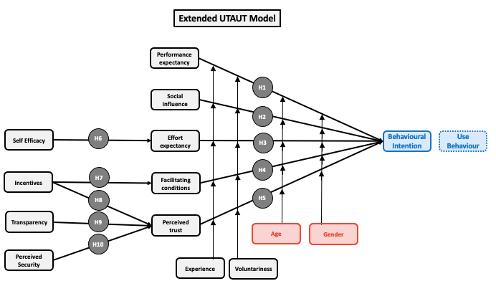

**Inner model**

In [ ]:
innerModelSaya = c.Structure()
innerModelSaya.add_path(["Facilitating Conditions"], ["Behaviour Intention"]) 
innerModelSaya.add_path(["Performance Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Effort Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Perceived Trust"], ["Behaviour Intention"])
innerModelSaya.add_path(["Social Influence"], ["Behaviour Intention"])
innerModelSaya.add_path(["Self Efficacy"], ["Effort Expectancy"])
innerModelSaya.add_path(["Incentives"], ["Facilitating Conditions", "Perceived Trust"])
innerModelSaya.add_path(["Transparency"], ["Perceived Trust"])
innerModelSaya.add_path(["Perceived Security"], ["Perceived Trust"])

**Outer model**

In [ ]:
outerModelSaya = c.Config(innerModelSaya.path(), scaled=False)
outerModelSaya.add_lv_with_columns_named("Facilitating Conditions", Mode.A, df, "Q12 Facilitating_") 
outerModelSaya.add_lv_with_columns_named("Performance Expectancy", Mode.A, df, "Q10 Performance_")
outerModelSaya.add_lv_with_columns_named("Effort Expectancy", Mode.A, df, "Q11 Effort_")
outerModelSaya.add_lv_with_columns_named("Perceived Trust", Mode.A, df, "Q8 Turst_")
outerModelSaya.add_lv_with_columns_named("Transparency", Mode.A, df, "Q5 Transparency_")
outerModelSaya.add_lv_with_columns_named("Perceived Security", Mode.A, df, "Q7 Security_")
outerModelSaya.add_lv_with_columns_named("Incentives", Mode.A, df, "Q4 Incentives_")
outerModelSaya.add_lv_with_columns_named("Self Efficacy", Mode.A, df, "Q6 Self Efficacy_")
outerModelSaya.add_lv_with_columns_named("Social Influence", Mode.A, df, "Q12 Social_")
outerModelSaya.add_lv_with_columns_named("Behaviour Intention", Mode.A, df, "Q13 Behaviour intent_")


**Run PLSPM**

In [ ]:
plspm_calc = Plspm(df, outerModelSaya, Scheme.CENTROID)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Tahap #1 Measurement Model Assessment


# Unidimensionality
Does the indicator represent well the variable it measures? cronbach alpha > 0.7

In [ ]:
asses_uni = plspm_calc.unidimensionality()
asses_uni

,mode,mvs,cronbach_alpha,dillon_goldstein_rho,eig_1st,eig_2nd
Perceived Security,A,4.0,0.850123,0.901607,2.801512,0.716583
Transparency,A,5.0,0.859984,0.899661,3.213462,0.574253
Incentives,A,4.0,0.667144,0.800509,2.097955,1.081600
Perceived Trust,A,3.0,0.864451,0.917198,2.360822,0.371987
Facilitating Conditions,A,3.0,0.630873,0.804652,1.786500,0.898937
Self Efficacy,A,5.0,0.823742,0.879835,3.020387,0.852934
Effort Expectancy,A,3.0,0.847574,0.907836,2.299827,0.401992
Social Influence,A,2.0,0.609006,0.836472,1.437821,0.562179
Performance Expectancy,A,5.0,0.887431,0.917499,3.450121,0.541218
Behaviour Intention,A,3.0,0.870832,0.920746,2.384371,0.341636


From the results of the command in the table above, it appears that the Cronbach alpha value for all variables is greater than 0.7, this indicates that the indicator represents the variables it measures well.


#Testing the relationship and reliability indicators
Does each indicator have a good relationship and reliability to measure its respective variables? through outer loading > 0.7 and communality test > 0.5

In [ ]:
asses_reliability = plspm_calc.outer_model()
asses_reliability

,weight,loading,communality,redundancy
Q10 Performance_1,0.258760,0.842925,0.710523,0.000000
Q10 Performance_2,0.230048,0.829918,0.688763,0.000000
Q10 Performance_3,0.246146,0.791112,0.625858,0.000000
Q10 Performance_4,0.244343,0.847714,0.718618,0.000000
Q10 Performance_5,0.308551,0.837637,0.701636,0.000000
Q11 Effort_1,0.346256,0.829073,0.687362,0.056623
Q11 Effort_2,0.478571,0.904854,0.818760,0.067448
Q11 Effort_3,0.408682,0.888020,0.788580,0.064961
Q12 Facilitating_1,0.302807,0.760010,0.577615,0.015399
Q12 Facilitating_2,0.466700,0.856884,0.734251,0.019575


The table of test results above shows the loading value of all indicators are greater than 0.7 and the value of communality is above 0.5(except Security 3, Self Efficacy3, Transparency 5,incentives 3, Facilitating 3), meaning all except the exceptation representing the construct well.


In [ ]:
asses_ave = plspm_calc.inner_summary()
asses_ave

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.594828,0.584222,0.794497,0.472589,0.794497
Effort Expectancy,Endogenous,0.082378,0.077672,0.764900,0.063011,0.764900
Facilitating Conditions,Endogenous,0.026659,0.021668,0.578383,0.015419,0.578383
Incentives,Exogenous,0.000000,0.000000,0.490877,0.000000,0.490877
Perceived Security,Exogenous,0.000000,0.000000,0.697394,0.000000,0.697394
Perceived Trust,Endogenous,0.567047,0.560317,0.786633,0.446058,0.786633
Performance Expectancy,Exogenous,0.000000,0.000000,0.689080,0.000000,0.689080
Self Efficacy,Exogenous,0.000000,0.000000,0.603172,0.000000,0.603172
Social Influence,Exogenous,0.000000,0.000000,0.715095,0.000000,0.715095
Transparency,Exogenous,0.000000,0.000000,0.125452,0.000000,0.125452


Save output as excel tables.

In [ ]:
with pd.ExcelWriter('before.xlsx') as writer1:
    asses_uni.to_excel(writer1, sheet_name = 'alpha_1', index = True)
    asses_reliability.to_excel(writer1, sheet_name = 'loading_1', index = True)
    asses_ave.to_excel(writer1, sheet_name = 'ave_1', index = True)

Drop items which do not confirm with validity measurments.

In [ ]:
df = df.drop('Q2 Technology_6', axis= 1)
df = df.drop('Q12 Facilitating_3', axis= 1)
df = df.drop('Q5 Transparency_5', axis= 1)
df = df.drop('Q5 Transparency_3', axis= 1)
df = df.drop('Q6 Self Efficacy_3', axis= 1)
df = df.drop('Q7 Security_3', axis= 1)
df = df.drop('Q4 Incentives_3', axis= 1)


# After droping items with loadings: Re-Do analysis
**Inner model**

In [ ]:
innerModelSaya = c.Structure()
innerModelSaya.add_path(["Facilitating Conditions"], ["Behaviour Intention"]) 
innerModelSaya.add_path(["Performance Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Effort Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Perceived Trust"], ["Behaviour Intention"])
innerModelSaya.add_path(["Social Influence"], ["Behaviour Intention"])
innerModelSaya.add_path(["Self Efficacy"], ["Effort Expectancy"])
innerModelSaya.add_path(["Incentives"], ["Facilitating Conditions", "Perceived Trust"])
innerModelSaya.add_path(["Transparency"], ["Perceived Trust"])
innerModelSaya.add_path(["Perceived Security"], ["Perceived Trust"])

**Outer model**

In [ ]:
outerModelSaya = c.Config(innerModelSaya.path(), scaled=False)
outerModelSaya.add_lv_with_columns_named("Facilitating Conditions", Mode.A, df, "Q12 Facilitating_") 
outerModelSaya.add_lv_with_columns_named("Performance Expectancy", Mode.A, df, "Q10 Performance_")
outerModelSaya.add_lv_with_columns_named("Effort Expectancy", Mode.A, df, "Q11 Effort_")
outerModelSaya.add_lv_with_columns_named("Perceived Trust", Mode.A, df, "Q8 Turst_")
outerModelSaya.add_lv_with_columns_named("Transparency", Mode.A, df, "Q5 Transparency_")
outerModelSaya.add_lv_with_columns_named("Perceived Security", Mode.A, df, "Q7 Security_")
outerModelSaya.add_lv_with_columns_named("Incentives", Mode.A, df, "Q4 Incentives_")
outerModelSaya.add_lv_with_columns_named("Self Efficacy", Mode.A, df, "Q6 Self Efficacy_")
outerModelSaya.add_lv_with_columns_named("Social Influence", Mode.A, df, "Q12 Social_")
outerModelSaya.add_lv_with_columns_named("Behaviour Intention", Mode.A, df, "Q13 Behaviour intent_")


**Run PLSPM**

In [ ]:
plspm_calc = Plspm( df, outerModelSaya, Scheme.CENTROID, 100, 0.000001)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



# Unidimensionality
does the indicator represent well the variable it measures? cronbach alpha > 0.7

In [ ]:
asses_uni = plspm_calc.unidimensionality()
asses_uni

,mode,mvs,cronbach_alpha,dillon_goldstein_rho,eig_1st,eig_2nd
Perceived Security,A,3.0,0.902311,0.938884,2.509909,0.278316
Transparency,A,3.0,0.836205,0.901562,2.259812,0.387551
Incentives,A,3.0,0.758573,0.863073,2.041560,0.691976
Perceived Trust,A,3.0,0.864451,0.917198,2.360822,0.371987
Facilitating Conditions,A,2.0,0.809427,0.913003,1.679863,0.320137
Self Efficacy,A,4.0,0.868606,0.910489,2.871980,0.513318
Effort Expectancy,A,3.0,0.847574,0.907836,2.299827,0.401992
Social Influence,A,2.0,0.609006,0.836472,1.437821,0.562179
Performance Expectancy,A,5.0,0.887431,0.917499,3.450121,0.541218
Behaviour Intention,A,3.0,0.870832,0.920746,2.384371,0.341636


#Testing the relationship and reliability indicators
Does each indicator have a good relationship and reliability to measure its respective variables? through outer loading > 0.7 and communality test > 0.5

In [ ]:
asses_reliability = plspm_calc.outer_model()
asses_reliability

,weight,loading,communality,redundancy
Q10 Performance_1,0.258717,0.842916,0.710508,0.000000
Q10 Performance_2,0.230091,0.829927,0.688779,0.000000
Q10 Performance_3,0.246150,0.791110,0.625855,0.000000
Q10 Performance_4,0.244311,0.847706,0.718606,0.000000
Q10 Performance_5,0.308579,0.837645,0.701649,0.000000
Q11 Effort_1,0.344209,0.828288,0.686061,0.055528
Q11 Effort_2,0.479204,0.905097,0.819200,0.066304
Q11 Effort_3,0.409937,0.888393,0.789242,0.063879
Q12 Facilitating_1,0.393356,0.877853,0.770626,0.032933
Q12 Facilitating_2,0.592745,0.948038,0.898776,0.038409


In [ ]:
asses_ave = plspm_calc.inner_summary()
asses_ave

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.595055,0.584454,0.794453,0.472743,0.794453
Effort Expectancy,Endogenous,0.080938,0.076224,0.764834,0.061904,0.764834
Facilitating Conditions,Endogenous,0.042735,0.037826,0.834701,0.035671,0.834701
Incentives,Exogenous,0.000000,0.000000,0.670445,0.000000,0.670445
Perceived Security,Exogenous,0.000000,0.000000,0.836516,0.000000,0.836516
Perceived Trust,Endogenous,0.564652,0.557885,0.786588,0.444149,0.786588
Performance Expectancy,Exogenous,0.000000,0.000000,0.689079,0.000000,0.689079
Self Efficacy,Exogenous,0.000000,0.000000,0.717620,0.000000,0.717620
Social Influence,Exogenous,0.000000,0.000000,0.715104,0.000000,0.715104
Transparency,Exogenous,0.000000,0.000000,0.743728,0.000000,0.743728


# Testing cross-loadings
indicators of each variable measure well the variable?

In [ ]:
asses_crossload = plspm_calc.crossloadings()
asses_crossload


,Perceived Security,Transparency,Incentives,Perceived Trust,Facilitating Conditions,Self Efficacy,Effort Expectancy,Social Influence,Performance Expectancy,Behaviour Intention
Q12 Facilitating_1,0.199169,0.041815,0.133588,0.185170,0.877853,0.169430,0.406211,0.207983,0.125493,0.187571
Q12 Facilitating_2,0.153179,0.068885,0.227793,0.182294,0.948038,0.187247,0.502321,0.255290,0.222748,0.256664
Q10 Performance_1,0.545467,0.114544,0.273487,0.561314,0.126247,0.622854,0.403141,0.470359,0.842916,0.596629
Q10 Performance_2,0.408747,0.079062,0.105026,0.458609,0.109986,0.556914,0.329990,0.420732,0.829927,0.492599
Q10 Performance_3,0.560405,0.131733,0.304663,0.622721,0.228578,0.726561,0.359021,0.337387,0.791110,0.550792
Q10 Performance_4,0.484260,0.090771,0.145977,0.526036,0.141062,0.609889,0.359452,0.403582,0.847706,0.526699
Q10 Performance_5,0.622129,0.002801,0.228961,0.617180,0.211980,0.642919,0.421948,0.390924,0.837645,0.680962
Q11 Effort_1,0.244481,0.024287,0.245513,0.242898,0.542869,0.208349,0.828288,0.343123,0.310598,0.342713
Q11 Effort_2,0.348872,0.014637,0.154446,0.410289,0.415375,0.281878,0.905097,0.404303,0.440621,0.467519
Q11 Effort_3,0.288547,-0.015999,0.127288,0.377305,0.391797,0.246457,0.888393,0.465253,0.423895,0.412650


# Stage #2 Structural Model Assessment


# Regression equation for each endogenous variable

---



In [ ]:
struct_reg = plspm_calc.inner_model()
struct_reg

,from,to,estimate,std error,t,p>|t|
index,,,,,,
Perceived Security -> Perceived Trust,Perceived Security,Perceived Trust,0.747946,0.049164,15.213336,7.242705e-35
Transparency -> Perceived Trust,Transparency,Perceived Trust,-0.065644,0.051684,-1.270104,2.055767e-01
Incentives -> Perceived Trust,Incentives,Perceived Trust,0.042443,0.052808,0.803720,4.225477e-01
Incentives -> Facilitating Conditions,Incentives,Facilitating Conditions,0.206724,0.070065,2.950480,3.561469e-03
Self Efficacy -> Effort Expectancy,Self Efficacy,Effort Expectancy,0.284495,0.068652,4.144001,5.084373e-05
Perceived Trust -> Behaviour Intention,Perceived Trust,Behaviour Intention,0.294704,0.063118,4.669109,5.688703e-06
Facilitating Conditions -> Behaviour Intention,Facilitating Conditions,Behaviour Intention,0.021665,0.053434,0.405449,6.856010e-01
Effort Expectancy -> Behaviour Intention,Effort Expectancy,Behaviour Intention,0.079174,0.061203,1.293621,1.973586e-01
Social Influence -> Behaviour Intention,Social Influence,Behaviour Intention,0.237608,0.055557,4.276859,2.992585e-05


# Coefficient of determination R<sup>2</sup> and Redundancy
Redundancy, the greater the value of mean_redundancy indicates the ability of the independent variable to be able to measure the variation of the endogenous variable.

In [ ]:
struct_redun = plspm_calc.inner_summary()
struct_redun

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.595055,0.584454,0.794453,0.472743,0.794453
Effort Expectancy,Endogenous,0.080938,0.076224,0.764834,0.061904,0.764834
Facilitating Conditions,Endogenous,0.042735,0.037826,0.834701,0.035671,0.834701
Incentives,Exogenous,0.000000,0.000000,0.670445,0.000000,0.670445
Perceived Security,Exogenous,0.000000,0.000000,0.836516,0.000000,0.836516
Perceived Trust,Endogenous,0.564652,0.557885,0.786588,0.444149,0.786588
Performance Expectancy,Exogenous,0.000000,0.000000,0.689079,0.000000,0.689079
Self Efficacy,Exogenous,0.000000,0.000000,0.717620,0.000000,0.717620
Social Influence,Exogenous,0.000000,0.000000,0.715104,0.000000,0.715104
Transparency,Exogenous,0.000000,0.000000,0.743728,0.000000,0.743728


In [ ]:
with pd.ExcelWriter('after.xlsx') as writer1:
    asses_uni.to_excel(writer1, sheet_name = 'alpha', index = True)
    asses_reliability.to_excel(writer1, sheet_name = 'loading', index = True)
    asses_ave.to_excel(writer1, sheet_name = 'ave', index = True)
    asses_crossload.to_excel(writer1, sheet_name = 'crossloadings', index = True)
    struct_redun.to_excel(writer1, sheet_name = 't_value', index = True)
    struct_reg.to_excel(writer1, sheet_name = 'R_2', index = True)


# die Anpassungsgüte (GoF)
Je größer der GoF-Wert, desto besser die Gesamtleistung und Qualität des Messmodells, sowohl des inneren als auch des äußeren Modells.

In [ ]:
struct_GoF = plspm_calc.goodness_of_fit()
struct_GoF

0.4900711804832411

In [ ]:
print(plspm_calc.effects())

                                                                   from  \
Perceived Security -> Perceived Trust                Perceived Security   
Perceived Security -> Behaviour Intention            Perceived Security   
Transparency -> Perceived Trust                            Transparency   
Transparency -> Behaviour Intention                        Transparency   
Incentives -> Perceived Trust                                Incentives   
Incentives -> Facilitating Conditions                        Incentives   
Incentives -> Behaviour Intention                            Incentives   
Perceived Trust -> Behaviour Intention                  Perceived Trust   
Facilitating Conditions -> Behaviour Intention  Facilitating Conditions   
Self Efficacy -> Effort Expectancy                        Self Efficacy   
Self Efficacy -> Behaviour Intention                      Self Efficacy   
Effort Expectancy -> Behaviour Intention              Effort Expectancy   
Social Influence -> Behav

In [ ]:
print(plspm_calc.path_coefficients())

                         Perceived Security  Transparency  Incentives  \
Perceived Security                 0.000000      0.000000    0.000000   
Transparency                       0.000000      0.000000    0.000000   
Incentives                         0.000000      0.000000    0.000000   
Perceived Trust                    0.747946     -0.065644    0.042443   
Facilitating Conditions            0.000000      0.000000    0.206724   
Self Efficacy                      0.000000      0.000000    0.000000   
Effort Expectancy                  0.000000      0.000000    0.000000   
Social Influence                   0.000000      0.000000    0.000000   
Performance Expectancy             0.000000      0.000000    0.000000   
Behaviour Intention                0.000000      0.000000    0.000000   

                         Perceived Trust  Facilitating Conditions  \
Perceived Security              0.000000                 0.000000   
Transparency                    0.000000                 0

# Tahap #3 Bootstrapping

In [ ]:
plspm_calc = Plspm(df, outerModelSaya, bootstrap=True, bootstrap_iterations=1000)
#the number of iterations according to the capacity of the internet/computer, there is a slight difference in the test results


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Direct effects for paths
calculated from bootstrap validation. This stage is carried out to test the hypothesis of the relationship between one variable to another in our model. 

In [ ]:
paths=plspm_calc.bootstrap().paths() 

**R squared (R<sup>2</sup>) for latent variables calculated from bootstrap validation.**

In [ ]:
R_squared=plspm_calc.bootstrap().r_squared()

Loadings of manifest variables calculated from bootstrap
validation.

In [ ]:
loading=plspm_calc.bootstrap().loading()

Outer weights calculated from bootstrap validation.

In [ ]:
weights=plspm_calc.bootstrap().weights()

In [ ]:
with pd.ExcelWriter('bootstrap.xlsx') as writer1:
    R_squared.to_excel(writer1, sheet_name = 'R2', index = True)
    loading.to_excel(writer1, sheet_name = 'loading', index = True)
    paths.to_excel(writer1, sheet_name = 'path', index = True)
    weights.to_excel(writer1, sheet_name = 'weights', index = True)


## References:

Garson, G. D. 2016. Partial Least Squares: Regression and Structural Equation Models. Asheboro, NC: Statistical Associates Publishers.

Gudergan, Siegfried P. & Ringle, Christian M. & Wende, Sven & Will, Alexander, 2008. “Confirmatory tetrad analysis in PLS path modeling,” Journal of Business Research, Elsevier, vol. 61(12), pages 1238-1249, December.

Hair, J. F., Hult, G. T. M., Ringle, C., & Sarstedt, M. (2017). A primer on partial least squares structural equation modeling (PLS-SEM). In SAGE Publications

Sanchez, G. 2013. PLS Path Modeling with R, Trowchez Editions. Berkeley, 2013. https://www.gastonsanchez.com/PLS_Path_Modeling_with_R.pdf

https://plspm.readthedocs.io/en/latest/source/plspm.bootstrap.html

https://pypi.org/project/plspm/